In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shape
import scipy.stats 
import seaborn as sns
import numpy as np
from scipy.stats.distributions import gamma


pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('data/FW_Veg_Rem_Combined.csv')
df = df.iloc[:, 2:]

In [11]:
cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

In [22]:
df['putout_time'] = pd.to_timedelta(df['putout_time'])
df['putout_days'] = df['putout_time'].map(lambda x: x.days)

In [13]:
def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'disc_month_num'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    return df_clean

In [26]:
df = preprocess_missing_weather_data(df)

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
vegitation_mapping = {
    1: "Tropical Evergreen Broadleaf Forest",
    2: "Tropical Deciduous Broadleaf Forest",
    3: "Temperate Evergreen Broadleaf Forest",
    4: "Temperate Evergreen Needleleaf Forest TmpENF",
    9: "C3 Grassland/Steppe",
    12: "Open Shrubland",
    14: "Desert",
    15: "Polar Desert/Rock/Ice",
    16: "Secondary Tropical Evergreen Broadleaf Forest",
}


In [34]:
#TODO
# 5. Task formulation for regression, multivariate correlation.
# 6. Regression model,multicollinearity and regularization (if needed). 

# 7. Quality analysis.

In [35]:
# For this lab you need subsample with 5-10 random variables, at least half of
# them should be described with continuous random variable type. Target variable
# should be continuous.

#columns for analysiss
target = "fire_size"
columns = ['state', 'stat_cause_descr',
            'disc_pre_year', 'disc_pre_month',
            'Wind_pre_7', 'Hum_pre_7',
            'Temp_pre_7', 'Prec_pre_7',
            'Vegetation', target]

df['disc_month_num'] = df['disc_clean_date'].map(lambda x: str(x).split('/')[0]).astype(int)

/var/folders/52/jlsyyvjj0vdg38ntl40v6j1h0000gp/T/ipykernel_61327/933464793.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


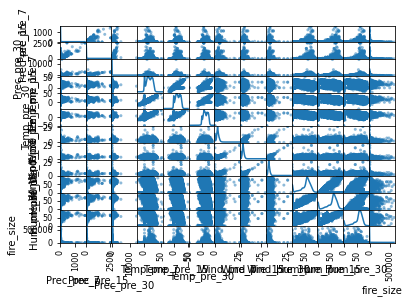

In [36]:
pd.plotting.scatter_matrix(df.loc[:, weather_columns + ['fire_size']], diagonal="kde")
plt.tight_layout()
plt.show()

In [37]:
# 1. Plotting a non-parametric estimation of PDF in form of a histogram and kernel
# density function for MRV (or probability law in case of discrete MRV).

In [ ]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [ ]:
# 2. Estimation of multivariate mathematical expectation and variance.

In [47]:
df[weather_columns].describe()

,Prec_pre_7,Prec_pre_15,Prec_pre_30,Temp_pre_7,Temp_pre_15,Temp_pre_30,Wind_pre_7,Wind_pre_15,Wind_pre_30,Hum_pre_7,Hum_pre_15,Hum_pre_30
count,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000
mean,6.776598,16.362748,36.399739,14.909938,14.771988,14.641182,2.740650,2.809727,2.920484,50.671468,52.627233,55.808301
std,31.194315,56.877499,111.792289,9.014628,8.847824,8.699849,1.435827,1.364218,1.263827,22.285205,21.451432,19.703704
min,0.000000,0.000000,0.000000,-20.846104,-37.000000,-49.210526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.251759,8.190710,8.108350,2.024219,2.121665,2.258290,42.293532,45.504921,51.095773
50%,0.000000,2.445000,11.500000,15.026896,14.624446,14.106935,2.724270,2.788073,2.846926,57.348190,59.130480,61.442409
75%,6.055602,18.600000,45.000000,22.374450,22.100023,21.957285,3.576549,3.605838,3.616066,65.407268,66.545814,67.947899
max,1638.000000,2527.000000,13560.800000,55.000000,51.567797,46.600000,25.700000,29.800000,29.800000,96.000000,94.000000,96.000000


In [45]:
df[weather_columns].apply(np.mean)

Prec_pre_7      6.776598
Prec_pre_15    16.362748
Prec_pre_30    36.399739
Temp_pre_7     14.909938
Temp_pre_15    14.771988
Temp_pre_30    14.641182
Wind_pre_7      2.740650
Wind_pre_15     2.809727
Wind_pre_30     2.920484
Hum_pre_7      50.671468
Hum_pre_15     52.627233
Hum_pre_30     55.808301
dtype: float64

In [46]:
df[weather_columns].apply(np.std)

Prec_pre_7      31.194034
Prec_pre_15     56.876986
Prec_pre_30    111.791279
Temp_pre_7       9.014546
Temp_pre_15      8.847744
Temp_pre_30      8.699771
Wind_pre_7       1.435814
Wind_pre_15      1.364205
Wind_pre_30      1.263816
Hum_pre_7       22.285004
Hum_pre_15      21.451238
Hum_pre_30      19.703527
dtype: float64

In [43]:
sns.set(rc={'figure.figsize':(16, 8)})

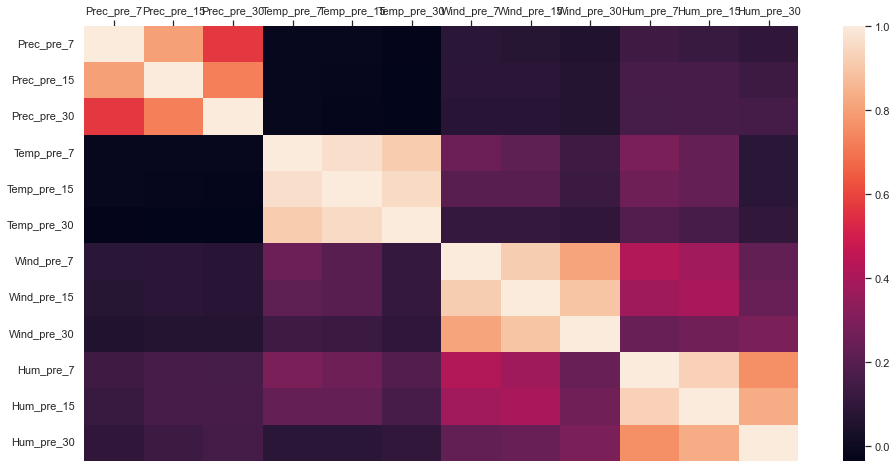

In [44]:
corrmat = df[weather_columns].corr()

sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [ ]:
# 3. Non-parametric estimation of conditional distributions, mathematical
# expectations and variances. 

In [ ]:
# 4. Estimation of pair correlation coefficients, confidence intervals for them and
# significance levels.